<a id="About the Dataset"></a>
# **1. About the Dataset**

<img src="https://www.book-editing.com/wp-content/uploads/2019/02/bestselling-books-2018-1080x675.jpg">

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads.

<a id="Import Dataset"></a>
# **2. Import Dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
df = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

<a id="Understand the Dataset"></a>
# **3. Understand the Dataset**

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


* There are six columns

    * Name = Title of the book
    
    * Author = Author of the book
    
    * User Rating = The rating given to the book (assuming scale of 1-5)
    
    * Reviews = The number of reviews given for a book
    
    * Price = The price of the book
    
    * Year = The year the book was a bestseller
    
    * Genre = The genre of the book

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


* 550 rows of data

* No null data in the dataset

In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


* User Rating - Ranges from 3.3 to 4.9

* Reviews - Ranges from 37 to 87841 of reviews (broad range)

* Price - Ranging from 0 - 105 (free books?)

* Year - 2009 to 2019

In [6]:
df.shape

(550, 7)

In [7]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

* A lot of unique books over the period (351) and authors (248).

* We have gotten a basic sense of the dataset (columns, size of dataset (550 x 7), a lot of unique books and authors (more unique books than authors)), with data over 11 years and in fiction/on-fiction, and related to price and reviews. Now let's delve deeper...

<a id="Data Exploration/Visualization"></a>
# **4. Data Exploration/Visualization**

<a id="4A. Univariate Analysis"></a>
#### 4A. Univariate Analysis

Let us examine each variable by itself.

**4A-1. Name**

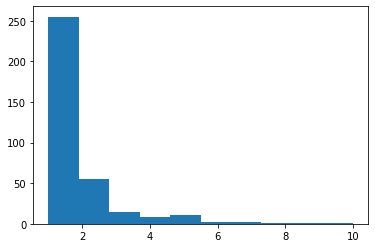

In [8]:
lst = []
for name in list(df['Name'].unique()):
    count = df['Name'].value_counts()[name]
    lst.append(count)

plt.hist(lst)
plt.show()

* Most books are listed between 1 and ~3-4 times. There dows appear to be the case of books appearing on amazon's bestseller list a lot more times than typical, even up to ten times on at least an occasion. Let's look and see...

In [9]:
df['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: Name, Length: 351, dtype: int64

* It is only one book that is on the bestseller list 10 times, and it is the Publication Manual of the American Psychological Association, 6th Edition...in research, it appears to be a textbbok which is to help guide students/professors/professionals who are writers in the behavioral/social sciences field. But let us confirm what this means, the fact that it shows up 10 times...

In [10]:
df.loc[df['Name'] == 'Publication Manual of the American Psychological Association, 6th Edition']

,Name,Author,User Rating,Reviews,Price,Year,Genre
271,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
272,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
273,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
274,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
279,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
280,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


* We can confirm it means 10 years out of the 11 (2009-2018) that the book showed up on the Amazon bestselling books list.

**4A-2. Author**

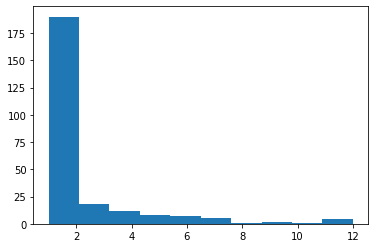

In [11]:
lst = []
for author in list(df['Author'].unique()):
    count = df['Author'].value_counts()[author]
    lst.append(count)

plt.hist(lst)
plt.show()

* Again, most authors are listed between 1 and ~3-4 times. There are authors that appear more often even than the longest standing books, with a material amount of authors having appeared above 10 times...

In [12]:
df['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [13]:
df.loc[df['Author'] == 'Jeff Kinney']

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction


* It would make sense that the frequent authors are more fiction than non-fiction...after all, one could only write so much aout their own life, eveni if they are an extremely famous celebrity.

**4A-3. User Rating**

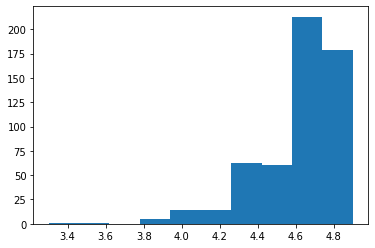

In [14]:
plt.hist(df['User Rating'])
plt.show()

* Most of the bestsellers are rated comfortably above 4.0; there are some unique cases below this amount.

**4A-4. Reviews**

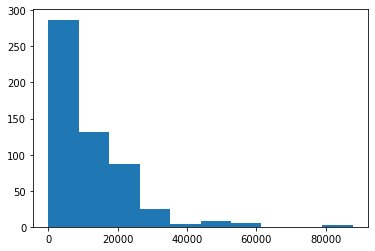

In [15]:
plt.hist(df['Reviews'])
plt.show()

* Most books have between 0 and 20000 reviews, with a range out past 80,000.

**4A-5. Price**

<AxesSubplot:xlabel='Price'>

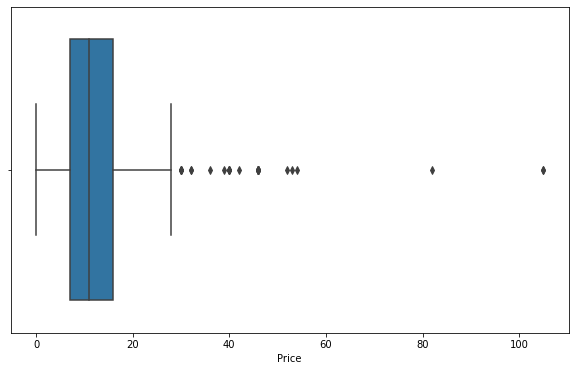

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Price'])

* Price has a range of 0 and around 30, with some outliers outside of that interquartile range.

* What books have a price of 0?

In [17]:
df.loc[df['Price'] == 0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


* Interesting that all but one of the books is fiction (and that is a copy of the Constitution).

* Also, it does not appear these books are free; on a quick Google search (12/19/2022) for Amazon prices (in dollars); 

    * Cabin Fever costs at least 8.99
    
    * Hard Luck costs at least 8.54
    
    * Frozen (Little Golden Book) costs at least 7.63
    
    * JOURNEY TO THE ICE P costs at least 7.11
    
    * Little Blue Truck costs at least 7.64
    
    * The Constitution costs at least 1.96
    
    * The Getaway costs at least 6.14
    
    * The Short Second Life of Bree Tanner: an Eclipse Novella costs at least 8.00
    
    * To Kill a Mockingbird costs at least 7.19
 
There are not many and we are not running models so we will leave these be.

**4A-6. Year**

([<matplotlib.patches.Wedge at 0x7f5d44b55c10>,
 [Text(1.0554422683381766, 0.30990582150899426, '2016'),
  Text(0.7203467861122989, 0.8313245501834299, '2011'),
  Text(0.15654627576372776, 1.0888035927312634, '2018'),
  Text(-0.45695657391819977, 1.0005951676641962, '2017'),
  Text(-0.9253789316708985, 0.5947048283136995, '2019'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '2014'),
  Text(-0.9253788203103135, -0.5947050015941457, '2010'),
  Text(-0.456956386553231, -1.0005952532309026, '2009'),
  Text(0.15654647964602333, -1.0888035634174043, '2015'),
  Text(0.7203469417807291, -0.8313244152959488, '2013'),
  Text(1.0554423263691122, -0.30990562387371495, '2012')],
 [Text(0.5756957827299144, 0.16903953900490593, '9.1%\n(50)'),
  Text(0.3929164287885266, 0.45344975464550713, '9.1%\n(50)'),
  Text(0.08538887768930604, 0.5938928687625072, '9.1%\n(50)'),
  Text(-0.24924904031901804, 0.5457791823622888, '9.1%\n(50)'),
  Text(-0.5047521445477627, 0.32438445180747244, '9.1%\n(50)'),

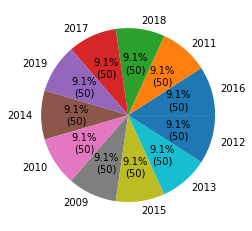

In [18]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['Year'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

* Each year is equally represented with 50 bestsellers.

**4A-7. Genre**

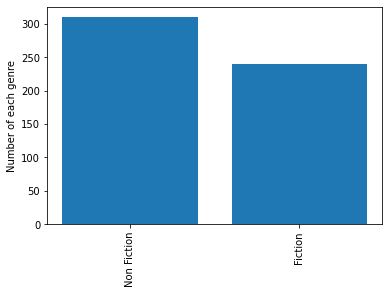

In [19]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(df['Genre'].unique(), df['Genre'].value_counts());

# Set the x-axis tick labels to the country names
ax.set_xticklabels(df['Genre'].unique(), rotation=90);

# Set the y-axis label
ax.set_ylabel("Number of each genre");

* A little over 300 non-fiction titles and close to 250 fiction titles over the period for bestsellers; mild imbalance, but balanced enough where the data is still fairly useful without any drastic distortions like over/undersampling (plus, we aren't running models).

* ***To conclude univariate analysis, we learned:***

    * Most books on the list are bestsellers 1 or a few times; similarly, most authors are authors of         bestsellers 1 or a few times
    
    * There are some outliers in terms of books (the Publication Manual in psychology which shows up in       10 of 11 years) and authors in terms of frequency (we see in the case of Jeff Kinney who had the         Diary of a Wimpy Kid series)
    
    * Most of the books are rated highly, as would be expected; the lowest is average (3.3)
    
    * Most of the books get many reviews.
    
    * Prices typically are 30-ish dollars or lower, though there are expensive outliers.
    
    * 50 bestsellers per year is represented by the data.
    
    * Mild imbalance, with slightly more than 300 non-fiction titles and near 250 fiction titles.
    
Now let us begin analyzing these variables in conjunction with each other.


<a id="4B. Univariate Analysis"></a>
#### 4B. Multivariate Analysis

Now let us see the relationship between variables.

We will first run a correlation table to get a general scope of what we will see when visualizing the data.

In [20]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


* **Interesting preliminary takeaways from this correlation table:**

    * There seems to be strong positive correlations between the year a book was published and the             amount of reviews it receives, and also the rating it gets.
    
    * There does also seem to be a material negative correlation between the year a book was published         and the price it sells at, which is interesting.
    
    * Also some material negative correlations between the price a book sells at and the rating the book       gets and the amount of reviews it receives.
    
    * No relationship appears to exist between the rating given to a book and the amount of reviews it         receives.

**4B-1. Author**

I personally thought an interesting thing to compare would be the data of authors who only show up once, versus authors who show up on numerous instances uring the 2009-2019 years, so that is how the visualization is structured.

In [21]:
def freq(dictionary): #create dictionary that adds you to a list if you are a key with a value of more than 1
    lst = []
    for x, y in dictionary.items():
        if y > 1:
            lst.append(x)
    return lst

def nonfreq(dictionary): #create dictionary that adds you to a list if you are a key with a value of 1
    lst = []
    for x, y in dictionary.items():
        if y == 1:
            lst.append(x)
    return lst

In [22]:
dct = dict(df['Author'].value_counts()) #this creates a dictionary with each author as a key and how often they show up in the dataset as a value
freq_author_df = df.loc[df['Author'].isin(freq(dct))] #create a dataframe of authors that show up more than once in the original dataset
nonfreq_author_df = df.loc[df['Author'].isin(nonfreq(dct))] #create a dataframe of authors that show up only once in the original dataset

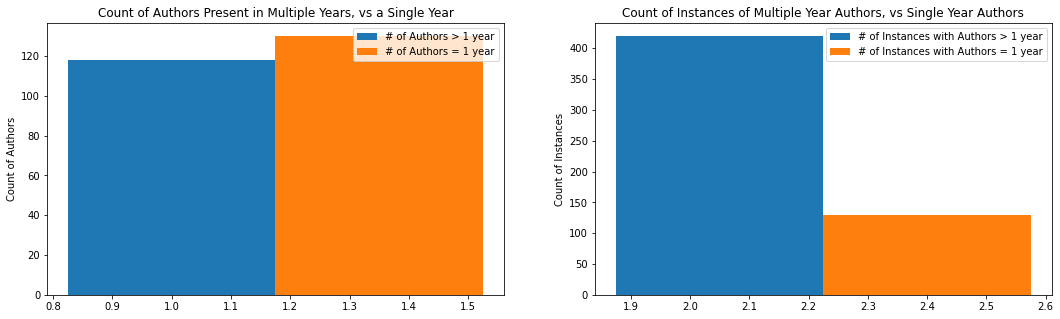

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))

index = 1
bar_width = 0.35

freq = ax1.bar(index, freq_author_df["Author"].nunique(), bar_width,
                label="# of Authors > 1 year")
nonfreq = ax1.bar(index+bar_width, nonfreq_author_df["Author"].nunique(),
                 bar_width, label="# of Authors = 1 year")
ax1.set_ylabel('Count of Authors')
ax1.set_title('Count of Authors Present in Multiple Years, vs a Single Year')


freq_amt = ax2.bar(index+(bar_width*3), freq_author_df["Author"].shape[0], bar_width,
                label="# of Instances with Authors > 1 year")
nonfreq_amt = ax2.bar(index+(bar_width*4), nonfreq_author_df["Author"].shape[0],
                 bar_width, label="# of Instances with Authors = 1 year")
ax2.set_ylabel('Count of Instances')
ax2.set_title('Count of Instances of Multiple Year Authors, vs Single Year Authors')

ax1.legend()
ax2.legend()


plt.show()

* The left chart shows that the amount of authors that show up multiple times are actually less than the authors that show up only once, which is interesting when viewed with the chart on the right, which shows authors that show up more than once make up almost 4 times with the authors who only show up once do (as far as amount of bestsellers).


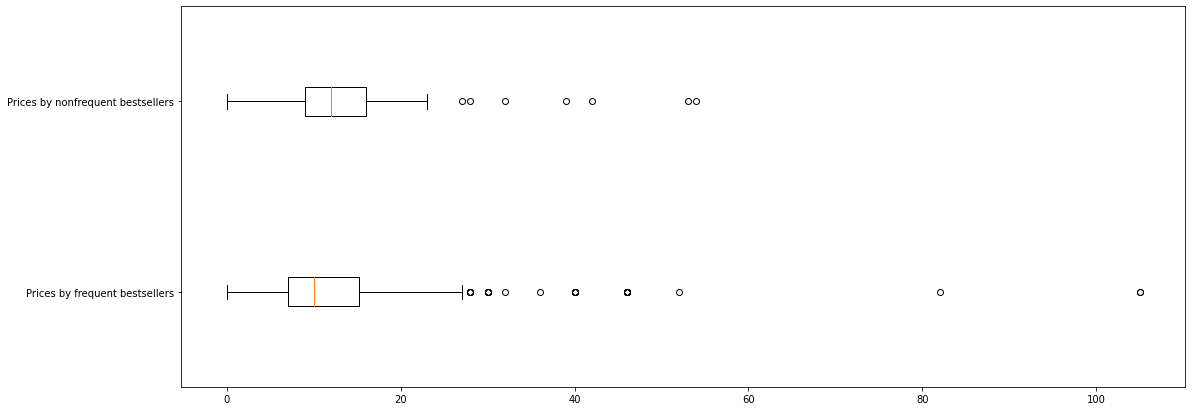

In [24]:
fig, ax = plt.subplots(figsize=(18,7))

data = [freq_author_df['Price'], nonfreq_author_df['Price']]
ax.boxplot(data, vert = 0)
ax.set_yticklabels(['Prices by frequent bestsellers', 'Prices by nonfrequent bestsellers'])

plt.show()

* Interestingly, the authors who only show up once in this dataset over the 11 year period seem to charge more than the authors who show up more than once...without digging too deeply, my common sense would attribute this to nonfrequent authors being celebrities and memoirs and things of that nature, who often get paid a pretty penny by publishers to write books.

* That being said, frequent authors have a broader range of prices, and account for the two books over 80 dollars (the one over 100 dollars is the Psychology Publication Manual (also the one for 10 years); maybe it is a textbook for college students?).

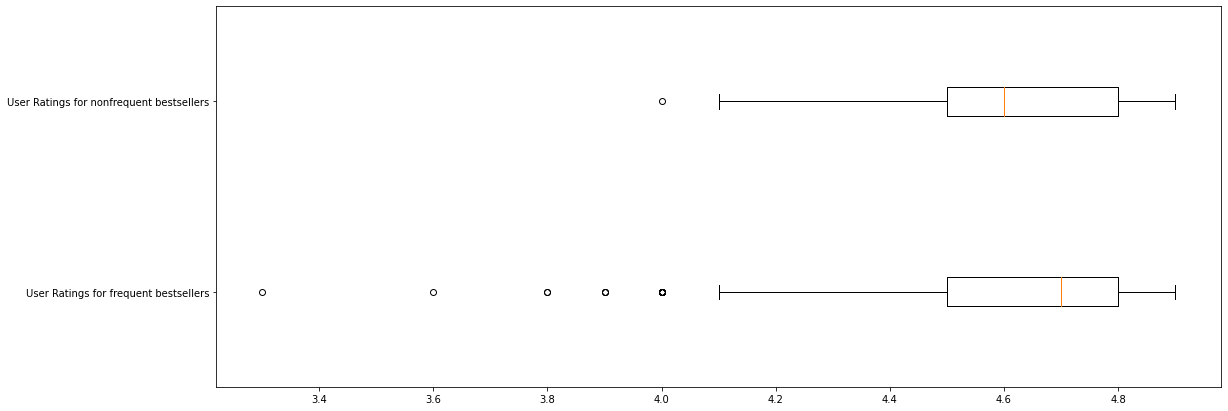

In [25]:
fig, ax = plt.subplots(figsize=(18,7))

data = [freq_author_df['User Rating'], nonfreq_author_df['User Rating']]
ax.boxplot(data, vert = 0)
ax.set_yticklabels(['User Ratings for frequent bestsellers', 'User Ratings for nonfrequent bestsellers'])

plt.show()

* Rating ranges are similar for frequent and nonfrequent authors, though median ranges are higher for frequent authors (maybe these authors have more of a built up fan base or something of that nature). More of the negative outliers are attributable to the frequent authors, though.

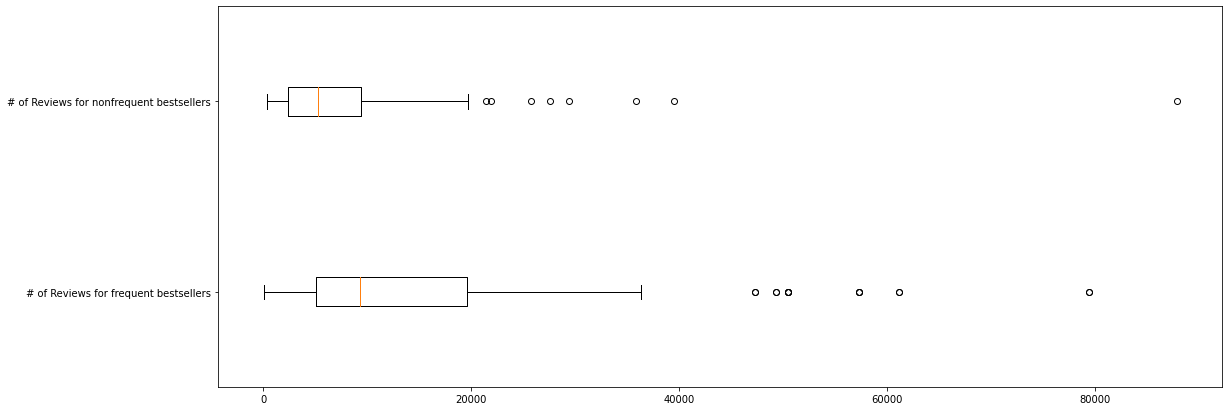

In [26]:
fig, ax = plt.subplots(figsize=(18,7))

data = [freq_author_df['Reviews'], nonfreq_author_df['Reviews']]
ax.boxplot(data, vert = 0)
ax.set_yticklabels(['# of Reviews for frequent bestsellers', '# of Reviews for nonfrequent bestsellers'])

plt.show()

* Median amount of reviews for authors frequently on the list is significantly higher than for nonfrequent authors, and the range of reviews for frequent authors is much broader and generally seem to be more extreme (although it was a nonfrequent author who generated more than 80000 reviews on a work; we will see who a little later).

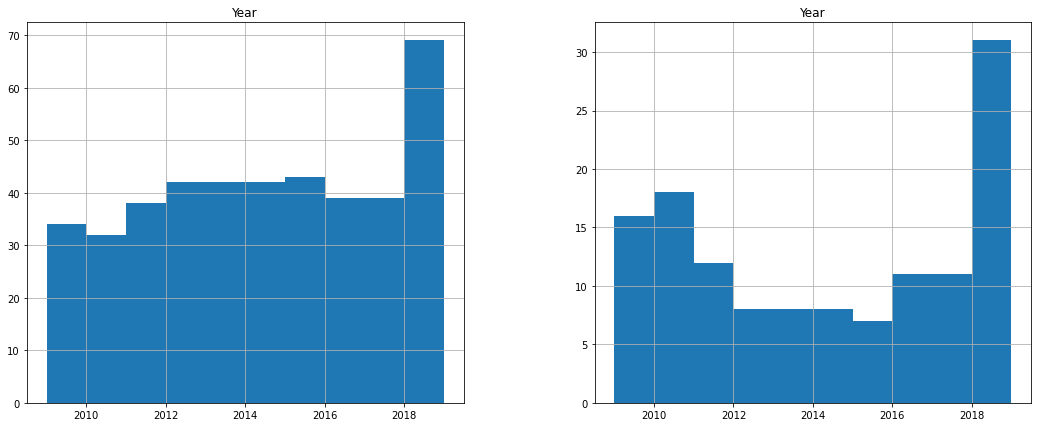

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(18,7))

freq_author_df.hist('Year', ax=axes[0])
nonfreq_author_df.hist('Year', ax=axes[1])

plt.show()

* Frequent authors (the chart on the left) made up what was a majority, and growing, share of the bestsellers in the mid-2010's.

Text(0.5, 1.0, 'Non-Frequent Authors')

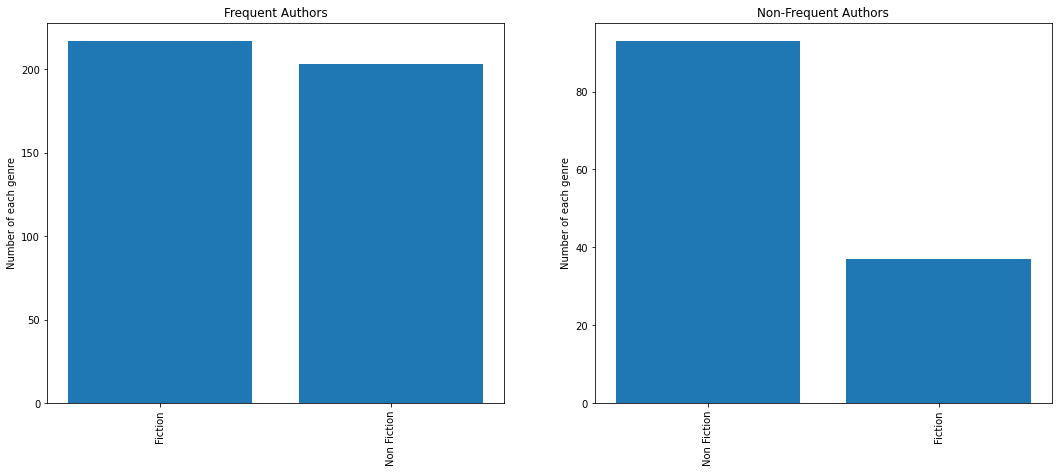

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,7))

# Plot a bar-chart of gold medals as a function of country
ax1.bar(freq_author_df['Genre'].unique(), freq_author_df['Genre'].value_counts());
# Set the x-axis tick labels to the country names
ax1.set_xticklabels(freq_author_df['Genre'].unique(), rotation=90);
# Set the y-axis label
ax1.set_ylabel("Number of each genre")
ax1.set_title('Frequent Authors')


# Plot a bar-chart of gold medals as a function of country
ax2.bar(nonfreq_author_df['Genre'].unique(), nonfreq_author_df['Genre'].value_counts());
# Set the x-axis tick labels to the country names
ax2.set_xticklabels(nonfreq_author_df['Genre'].unique(), rotation=90);
# Set the y-axis label
ax2.set_ylabel("Number of each genre")
ax2.set_title('Non-Frequent Authors')


* Interestingly, those frequent authors wrote more fiction than non-fiction, although only slightly; it appears the non-frequent authors and their significant rate of publishing non-fiction is what makes the key overall difference.

**4B-2. User Rating**

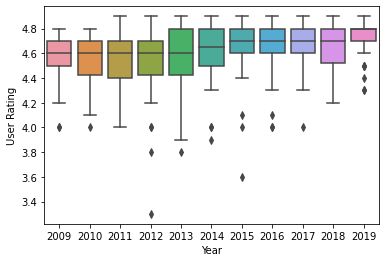

In [46]:
sns.boxplot(x=df['Year'],y=df['User Rating'])
plt.show()

* If you look at the interquartile ranges captured in the boxes, as the years progressed, it appears ratings increased over the long run. This jibes with our earlier correlation table.

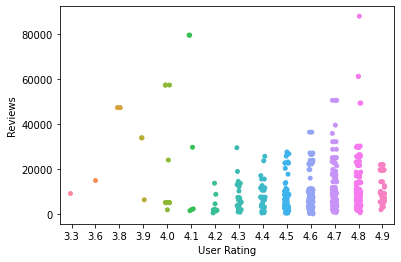

In [48]:
sns.stripplot(x=df['User Rating'], y=df['Reviews'])
plt.show()

* Similarly, outside of outliers, number of reviews seem to generally increase as the rating given to a book increases. It would be interesting to see what would happen if we standardized this data (if we we modelling).

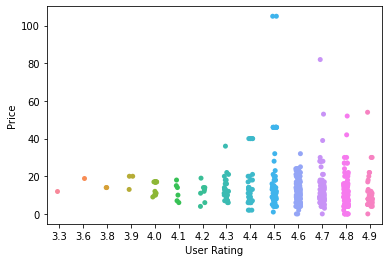

In [31]:
sns.stripplot(x=df['User Rating'], y=df['Price'])
plt.show()

* Similarly, it appears that as user rating goes up, price goes up (although this is not what the correlation table told us; maybe this is a bad graph to be looking at); this may also be due to more datapoints simply being at higher ratings, which may distort the visualization. 

* Let's use a regplot and see what we can visualize..

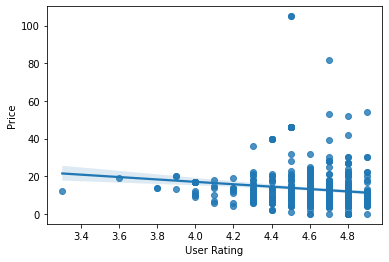

In [49]:
sns.regplot(x=df['User Rating'], y=df['Price'])
plt.show()

* Now a negative trend can definitely be seen.

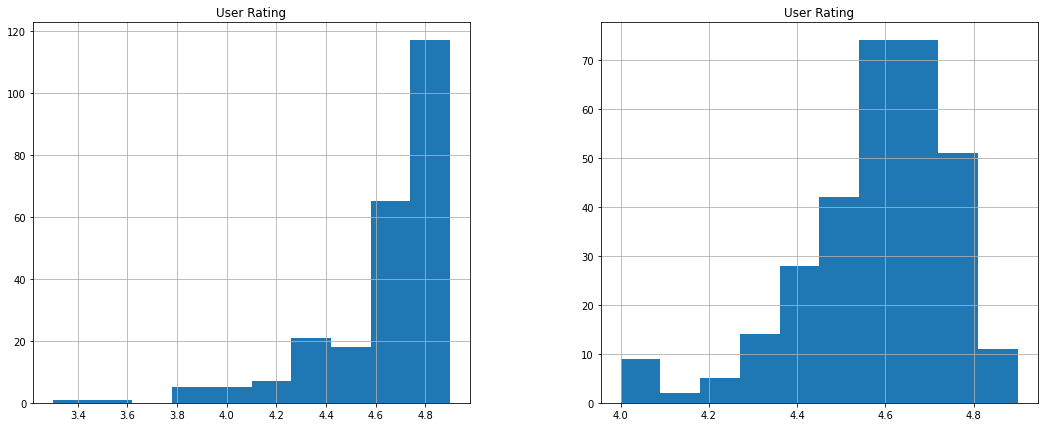

In [32]:
fiction_df = df.loc[df['Genre'] == 'Fiction']
nonfiction_df = df.loc[df['Genre'] == 'Non Fiction']

fig, axes = plt.subplots(1, 2, figsize=(18,7))

fiction_df.hist('User Rating', ax=axes[0])
nonfiction_df.hist('User Rating', ax=axes[1])

plt.show()


* Above we created two separate dataframes for comparison; one for fiction books and one for nonfiction books. 

* On the left is fiction, on the right is nonfiction; nonfiction seems to have a more Gaussian distribution and appears to cut off at 4.0 in its range of ratings, while fiction is skewed more left an has a material amount of datapoints below 4.0.

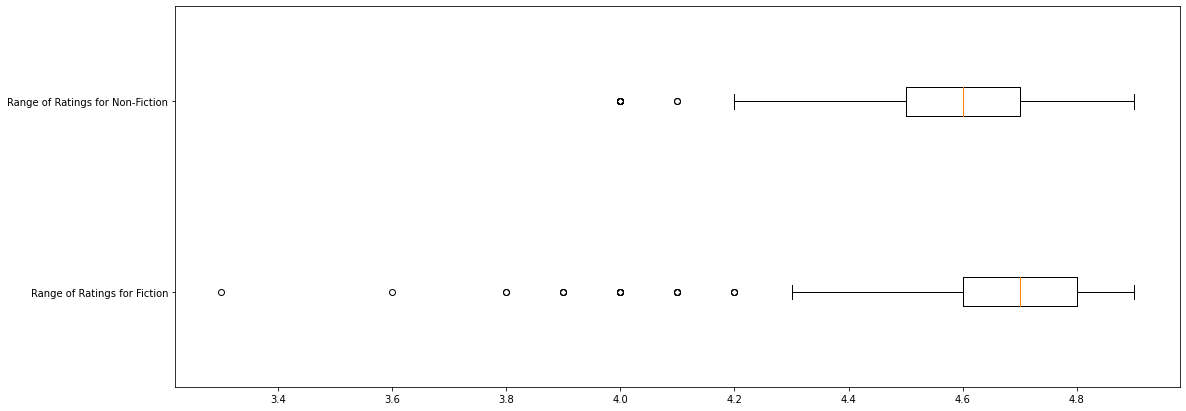

In [33]:
fig, ax = plt.subplots(figsize=(18,7))

data = [fiction_df['User Rating'], nonfiction_df['User Rating']]
ax.boxplot(data, vert = 0)
ax.set_yticklabels(['Range of Ratings for Fiction', 'Range of Ratings for Non-Fiction'])

plt.show()

* A reiteration of the chart above it; nonfiction has no ratings below 4.0; fiction has more outliers and datapoints below 3.4.

**4B-3. Reviews**

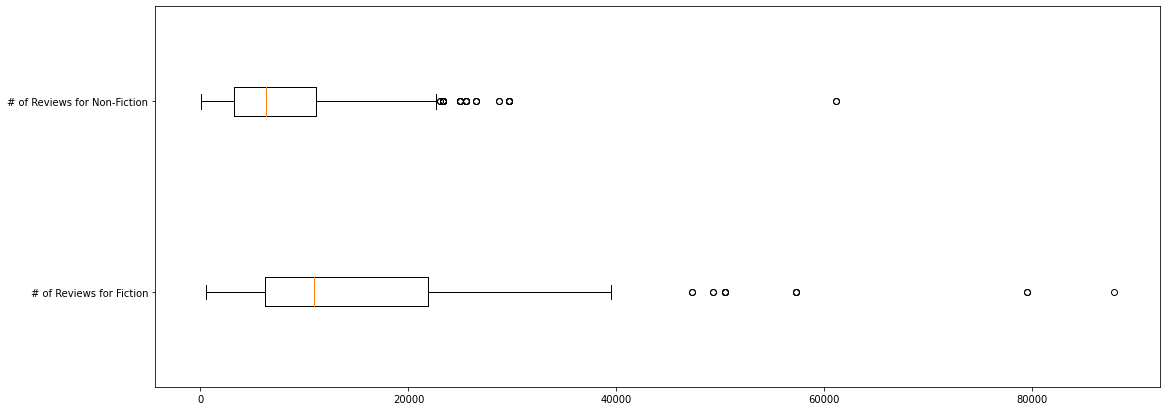

In [34]:
fig, ax = plt.subplots(figsize=(18,7))

data = [fiction_df['Reviews'], nonfiction_df['Reviews']]
ax.boxplot(data, vert = 0)
ax.set_yticklabels(['# of Reviews for Fiction', '# of Reviews for Non-Fiction'])

plt.show()

* Many more reviews for fiction on a median basis an on a range basis; they also include the highest review outliers.

* Now that we know the frequent authors primarily wrote fiction, it makes sense that this chart looks similar to the one in Section 4B-1 above.

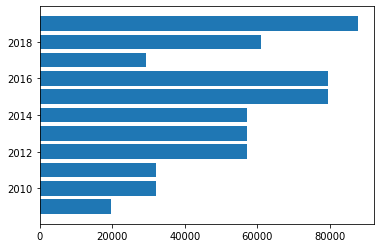

In [35]:
plt.barh(y=df['Year'], width=df['Reviews'])
plt.show()

* There definitely have been an increase in reviews as the years have gone on.

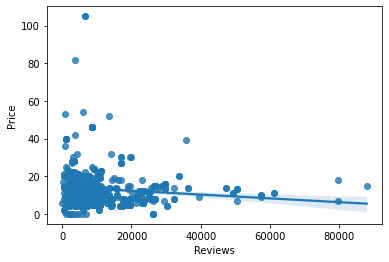

In [36]:
sns.regplot(x=df['Reviews'], y=df['Price'])
plt.show()

* The relationship is not strong here (the highest price seems to happen with very few relative reviews), but in finding a line of best fit using seaborn's regplot, we see that the relationship definitely is a negative one as we saw in the coreelation table.

* This chart makes me wonder, what are the outliers (more than 80000, lowest, etc), and what causes that difference?


In [37]:
df.loc[df['Reviews'] > 80000]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [38]:
df.loc[df['Reviews'] < 50]

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction


* Interestingly, the book with the highest amount of reviews is a fiction book, while the book with the lowest amount is non-fiction.

**4B-4. Price**

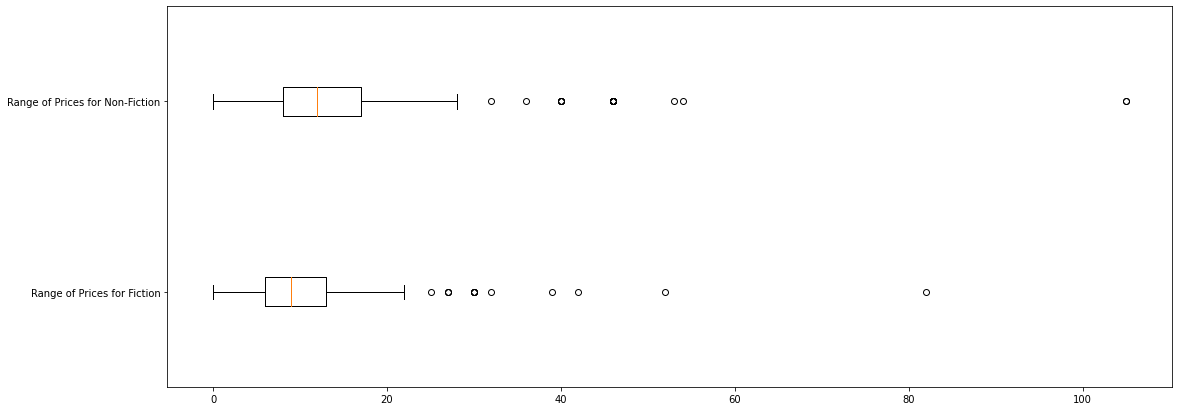

In [39]:
fig, ax = plt.subplots(figsize=(18,7))

data = [fiction_df['Price'], nonfiction_df['Price']]
ax.boxplot(data, vert = 0)
ax.set_yticklabels(['Range of Prices for Fiction', 'Range of Prices for Non-Fiction'])

plt.show()

* On a fiction/non-fiction basis, the non-fiction books have a higher median price charge and higher range of prices on an interquartile basis, as well as the most extreme price (the psychology manual). This chart is fairly similar to the price chart as it pertains to non-frequent and frequent authors (you could make the case this furthers the case most non-freequent authors are non-fiction writers, and most frequent authors and fiction writiers).

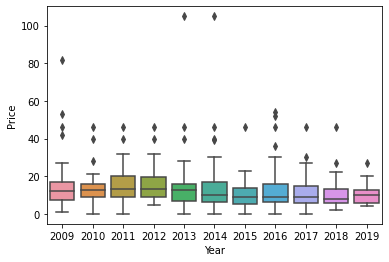

In [40]:
sns.boxplot(x=df['Year'], y=df['Price'])
plt.show()

* Although very slightly, if you look closely, the interquartile range has gotten smaller from 2009 to 2019 over the long run, making the negative correlation between year and price make sense.

**4B-5. Year**

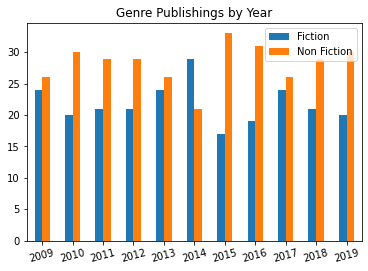

In [41]:
# Python dictionary

Genres = {"Fiction": [len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2009)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2010)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2011)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2012)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2013)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2014)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2015)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2016)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2017)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2018)]),
                                   len(df.loc[(df['Genre'] == 'Fiction') & (df['Year'] == 2019)])],
                       
                       "Non Fiction":[len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2009)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2010)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2011)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2012)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2013)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2014)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2015)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2016)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2017)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2018)]),
                                      len(df.loc[(df['Genre'] == 'Non Fiction') & (df['Year'] == 2019)])]};

index = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"];

 

# Python dictionary into a pandas DataFrame

dataFrame = pd.DataFrame(data = Genres, index=index);

dataFrame.plot.bar(rot=15, title="Genre Publishings by Year");

plt.show(block=True);

* Outside of 2014, in every year more non-fiction books are published than non-fiction.